## Midwest Traffic Accidents Time Series Analysis

### Contents

#### 01 Import Libraries and Data
#### 02 Subset, Wrangle, and Clean Data
#### 03 Time Series Analysis:  Decomposition
#### 04 Test for Stationarity
#### 05 Stationarize Data

###  01 Importing Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using the public access version of statsmodels
import os
import warnings

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Create path variable for main project folder
path = r'D:\JupyterProjects\09-2022 Midwest Accidents Analysis'

In [3]:
# Import accidents data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'MidwestCleanUpdated.csv'), index_col = False)

### Subset, Wrangle, and Clean Data 

In [4]:
df.shape

(279223, 20)

In [5]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,State,Temperature(F),Pressure(in),Visibility(mi),Weather_Condition,Year,Day,Month,Day_of_Week,Hour,Weekday,Weekend,State_Accidents,Day Category
0,3,40.108910,-83.092860,3.230,R,Dublin,OH,42.1,29.76,10.0,Rain,2016,8,2,0,0,1.0,0.0,23725,Weekday
1,2,39.865420,-84.062800,0.747,R,Dayton,OH,36.9,29.68,10.0,Rain,2016,8,2,0,5,1.0,0.0,23725,Weekday
2,2,39.102660,-84.524680,0.055,R,Cincinnati,OH,36.0,29.70,10.0,Cloudy/Overcast,2016,8,2,0,6,1.0,0.0,23725,Weekday
3,2,41.062130,-81.537840,0.123,R,Akron,OH,39.0,29.65,10.0,Cloudy/Overcast,2016,8,2,0,6,1.0,0.0,23725,Weekday
4,3,39.172393,-84.492792,0.500,R,Cincinnati,OH,37.0,29.69,10.0,Rain,2016,8,2,0,7,1.0,0.0,23725,Weekday


In [6]:
# Create new column with year and month combined

df['Date'] = pd.to_datetime(df.Year.astype(str) + '-' + df.Month.astype(str))

In [7]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,State,Temperature(F),Pressure(in),Visibility(mi),...,Year,Day,Month,Day_of_Week,Hour,Weekday,Weekend,State_Accidents,Day Category,Date
0,3,40.108910,-83.092860,3.230,R,Dublin,OH,42.1,29.76,10.0,...,2016,8,2,0,0,1.0,0.0,23725,Weekday,2016-02-01
1,2,39.865420,-84.062800,0.747,R,Dayton,OH,36.9,29.68,10.0,...,2016,8,2,0,5,1.0,0.0,23725,Weekday,2016-02-01
2,2,39.102660,-84.524680,0.055,R,Cincinnati,OH,36.0,29.70,10.0,...,2016,8,2,0,6,1.0,0.0,23725,Weekday,2016-02-01
3,2,41.062130,-81.537840,0.123,R,Akron,OH,39.0,29.65,10.0,...,2016,8,2,0,6,1.0,0.0,23725,Weekday,2016-02-01
4,3,39.172393,-84.492792,0.500,R,Cincinnati,OH,37.0,29.69,10.0,...,2016,8,2,0,7,1.0,0.0,23725,Weekday,2016-02-01


In [8]:
# Create new dataframe with count of accidents grouped by dates

data = df.groupby('Date').agg({'State': ['count']})

In [9]:
data.shape

(71, 1)

In [10]:
data.head()

,State
,count
Date,
2016-02-01,431
2016-03-01,563
2016-04-01,665
2016-05-01,500
2016-06-01,1388


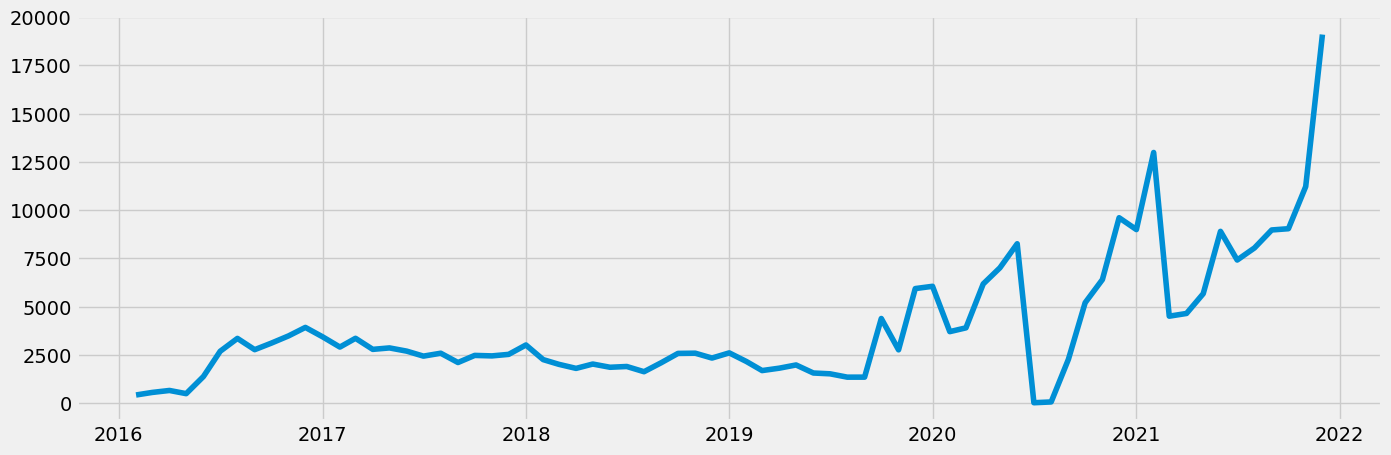

In [11]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [12]:
data_sub = data.loc['2016-01-01':'2021-12-31']

In [13]:
data_sub.shape

(71, 1)

In [14]:
data_sub.head(20)

,State
,count
Date,
2016-02-01,431
2016-03-01,563
2016-04-01,665
2016-05-01,500
2016-06-01,1388
2016-07-01,2693
2016-08-01,3360
2016-09-01,2777


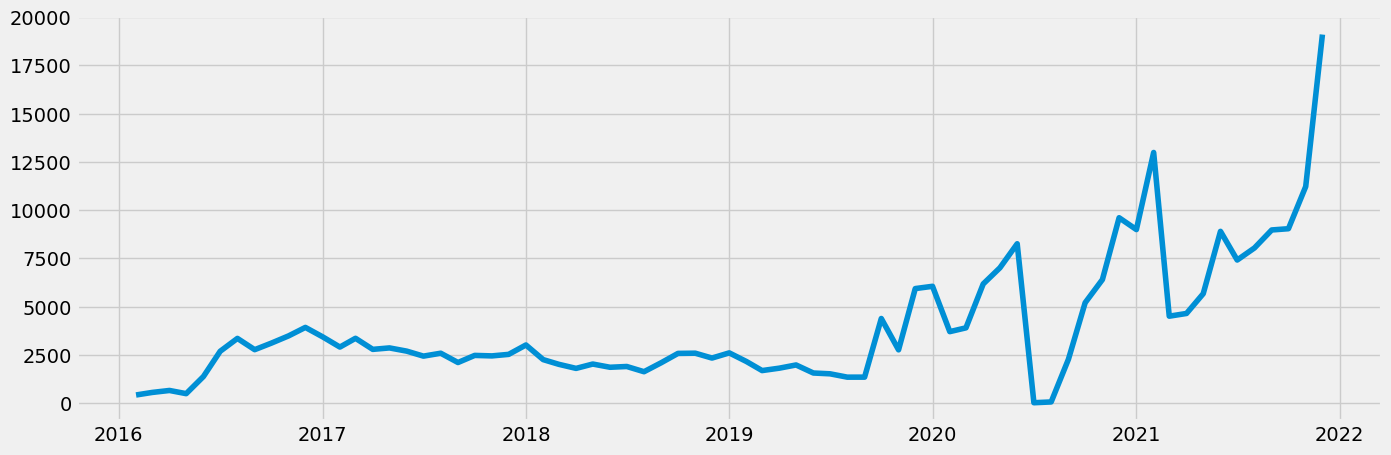

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [16]:
# Check for missing values

data_sub.isnull().sum() 

State  count    0
dtype: int64

In [17]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

### 3. Time-series analysis: decomposition

In [18]:
# Use additive model to decompose the time series

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
# Set figure size

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

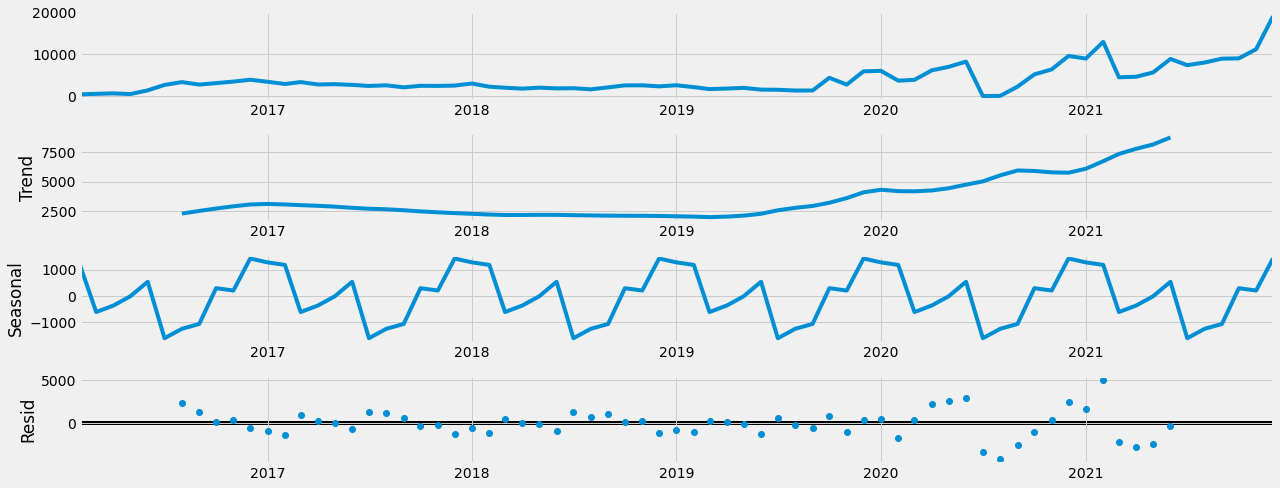

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

In [ ]:
The decomposition shows an upward trend in traffic accidents from 2016-2021. The first line is the data itself.  The second line
is smoothed and shows the underlying trend.  The third line shows seasonality with a pattern repeating itself at the same time
each year.  The fourth line show noise, particularly around 2020-2021 which makes sense due to closures and reopenings related 
to the CODID-19 pandemic.

### 4. Testing for stationarity

In [21]:
# Test for the presence of a unit root.  Apply adfuller() function which imports from statsmodels and returns 
# an array of numbers. Define a function that prints the correct output from that array.

# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['State'])

Dickey-Fuller Stationarity test:
Test Statistic                  3.370347
p-value                         1.000000
Number of Lags Used            11.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


H0 = No unit root (stationary data)
HA = Unit root present (non-stationary data)

The Test Statistic of 3.370347 is larger than the Critical Value (5%) of -2.911939, meaning that the null hypothesis cannot be rejected. The result is also not significant as the p-value is more than 0.05.

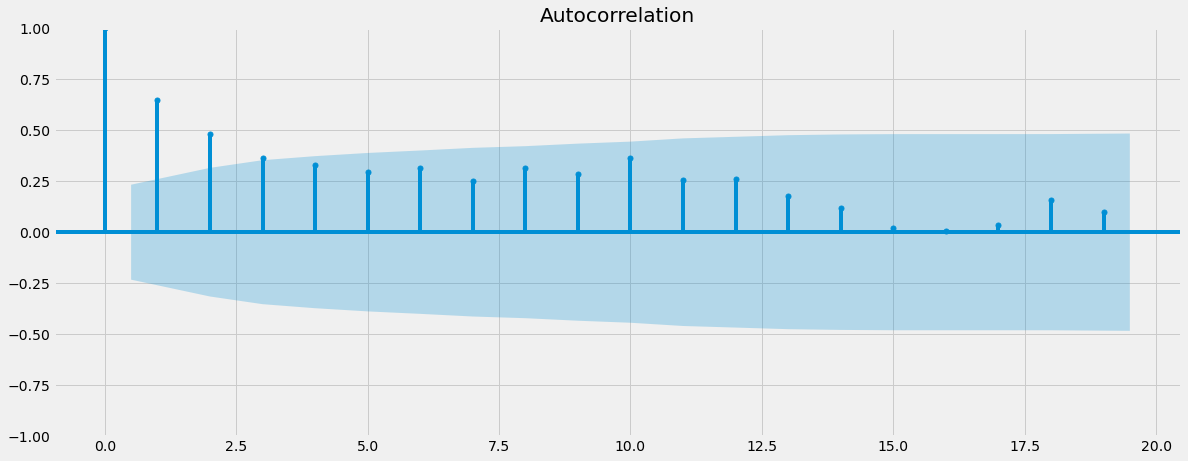

In [22]:
# Import autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_sub)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval.  The lines extending above the blue edge of the confidence interval indicate lags that are significantly correlated and one can deduce that your data is non-stationary. This supports the result of the Dickey-Fuller test.

### 05 Stationarize Data

In [23]:
# Use df.shift(1) function to change observation to t-1, making the whole thing t - (t -1)
data_diff = data_sub - data_sub.shift(1) 

In [24]:
# Remove missing values that can result from differencing in order to run Dickey-Fuller test
data_diff.dropna(inplace = True) 

In [25]:
data_diff.head()

,State
,count
Date,
2016-03-01,132.0
2016-04-01,102.0
2016-05-01,-165.0
2016-06-01,888.0
2016-07-01,1305.0


In [26]:
data_diff.columns

MultiIndex([('State', 'count')],
           )

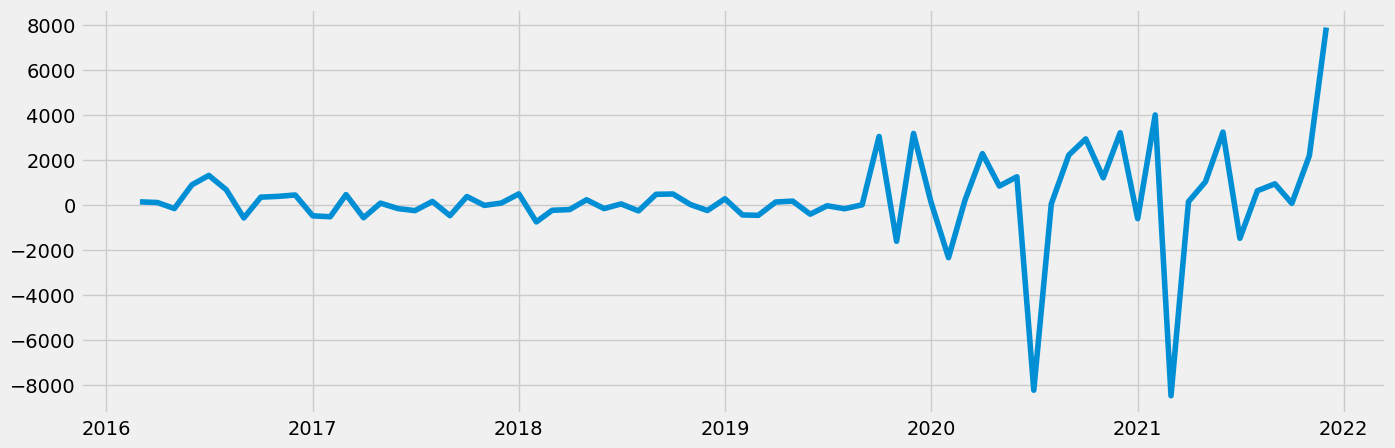

In [27]:
# View changes after differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.305772
p-value                         0.014622
Number of Lags Used             8.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


H0 = No unit root (stationary data)
HA = Unit root present (non-stationary data)

The Test Statistic of -3.305772 is smaller than the Critical Value (5%) of -2.910236, meaning that the null hypothesis can be rejected. The result is significant with a p-value of less than 0.05.

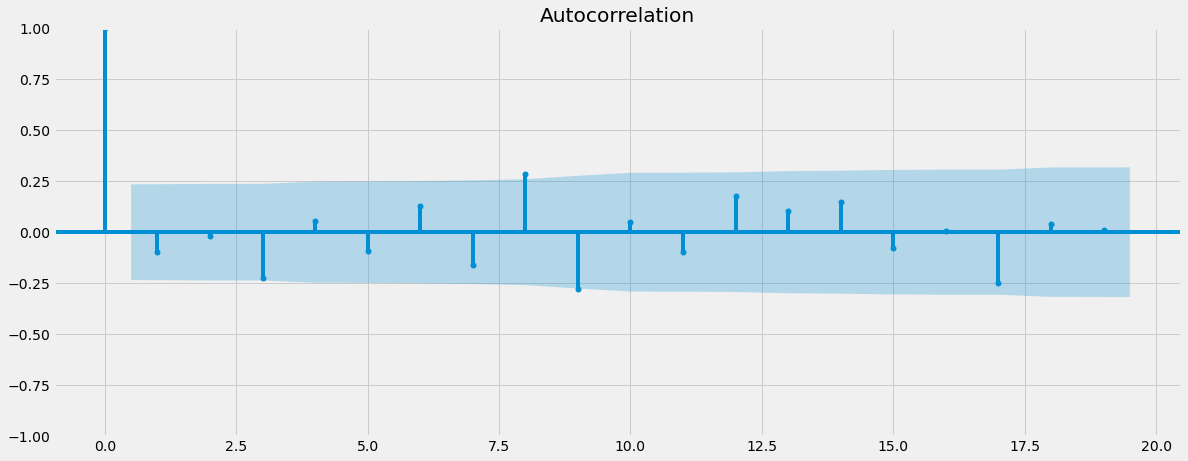

In [29]:
plot_acf(data_diff)
plt.show()

The autocorrelation plot has improved. The stationarity is much stronger with few vertical lines extending above the confidence interval.